In [1]:
import pandas as pd
import numpy as np
import altair as alt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import glob

## Submission Sentiment by Age and Gender

In [5]:
file_list = [pd.read_csv(filename) for filename in glob.glob("./submission_age_gender_sentiment.csv/*.csv")]
submission_age_gender_sentiment = pd.concat(file_list, axis = 0)
submission_age_gender_sentiment.head(5)

,regex_age,regex_gender,sentiment
0,27,f,negative
1,21,f,neutral
2,21,m,negative
3,25,f,negative
4,23,m,negative


In [27]:
submission_age_gender_sentiment.loc[~submission_age_gender_sentiment['regex_gender'].isin(['m', 'f']), 'regex_gender'] = 'other'

### Sentiment by Age

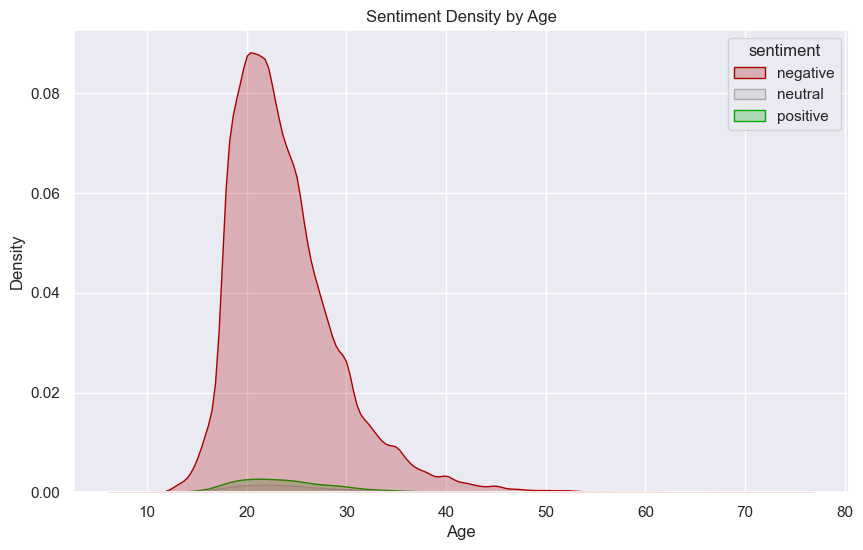

In [52]:
sns.set_theme()

palette = dict(negative = '#aa0000', neutral = '#aaaaaa', positive = '#00aa00')

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.kdeplot(submission_age_gender_sentiment, x = 'regex_age', hue = 'sentiment', fill = True, palette = palette, ax = ax)
ax.set_xlabel('Age'); ax.set_ylabel('Density'); ax.set_title('Sentiment Density by Age')
plt.show()

### Sentiment by Gender

In [65]:
df = pd.DataFrame(submission_age_gender_sentiment[['sentiment', 'regex_gender']].value_counts()).reset_index()
df.columns = ['sentiment', 'regex_gender', 'count']
df

,sentiment,regex_gender,count
0,negative,f,33831
1,negative,m,21453
2,positive,f,1243
3,negative,other,785
4,positive,m,769
5,neutral,f,664
6,neutral,m,435
7,positive,other,43
8,neutral,other,19


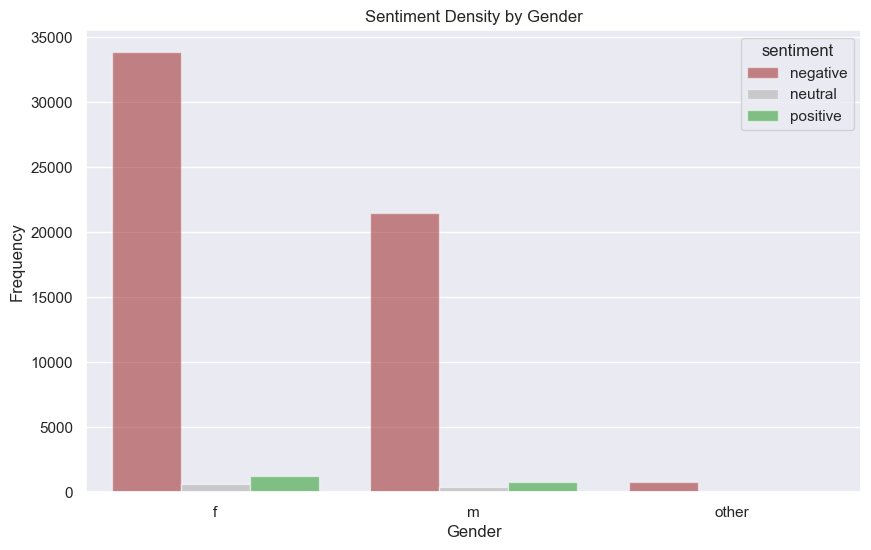

In [73]:
sns.set_theme()

palette = dict(negative = '#aa0000', neutral = '#aaaaaa', positive = '#00aa00')

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.barplot(
    data = df, x = 'regex_gender', y = 'count', hue = 'sentiment', hue_order = ['negative', 'neutral', 'positive'],
    palette = palette, alpha = 0.5, ax = ax)
ax.set_xlabel('Gender'); ax.set_ylabel('Frequency'); ax.set_title('Sentiment Density by Gender')
plt.show()

In [83]:
df = pd.DataFrame(submission_age_gender_sentiment[['sentiment', 'regex_gender']].value_counts()).reset_index()
df.columns = ['sentiment', 'regex_gender', 'count']
df

,sentiment,regex_gender,count
0,negative,f,33831
1,negative,m,21453
2,positive,f,1243
3,negative,other,785
4,positive,m,769
5,neutral,f,664
6,neutral,m,435
7,positive,other,43
8,neutral,other,19


In [84]:
sentiments = ['negative', 'neutral', 'positive']
genders = ['f', 'm', 'other']

t = np.zeros(shape = (3, 3))
for si, s in enumerate(sentiments):
    for gi, g in enumerate(genders):
        t[si, gi] = df.loc[(df['sentiment'] == s) & (df['regex_gender'] == g), 'count']

In [85]:
df_table = pd.DataFrame(t, columns = genders, index = sentiments)
df_table

,f,m,other
negative,33831.0,21453.0,785.0
neutral,664.0,435.0,19.0
positive,1243.0,769.0,43.0


In [87]:
df_table / df_table.sum(axis = 0)

,f,m,other
negative,0.946639,0.946860,0.926800
neutral,0.018580,0.019199,0.022432
positive,0.034781,0.033941,0.050767
